<a href="https://colab.research.google.com/github/SebastianMoralesDuque/ColabNotebooks/blob/main/SebastianMorales_JuanAngelArdila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar librerías

In [ ]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

Codigo para cargar el archivo .csv


In [ ]:
# Subir el archivo CSV
datos = files.upload()
archivo = list(datos.keys())[0]
# Cargar el archivo CSV en un DataFrame de Panda
df = pd.read_csv(archivo)

Saving adult.csv - adult.csv to adult.csv - adult.csv


In [ ]:
# Obtener información sobre los tipos de datos de las columnas
tipos_de_datos = df.dtypes

# Mostrar los tipos de datos de las columnas
print(tipos_de_datos)

edad                  int64
tipo_empleo          object
codigo                int64
nivel_educativo      object
experiencia           int64
estado_civil         object
ocupacion            object
relacion_familiar    object
raza                 object
genero               object
ganancias             int64
perdidas              int64
horas_semanales       int64
pais                 object
salario              object
dtype: object


# *Punto 1*
Complete el diccionario de datos (en tipo poner entero, real, binominal o polinominal)

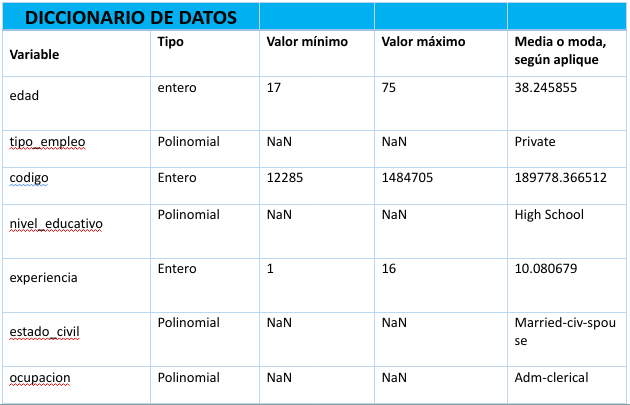
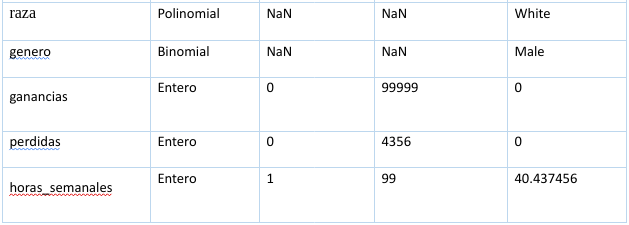
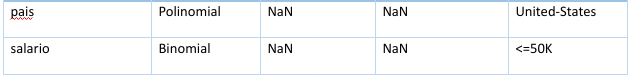

# *Punto 2*
Para identificar los datos faltantes se ha revisado la tabla de datos en una hoja de cálculo y se ha podido observar que los datos nulos han sido registrados con el símbolo “?”, como se puede ver en la siguiente imagen.
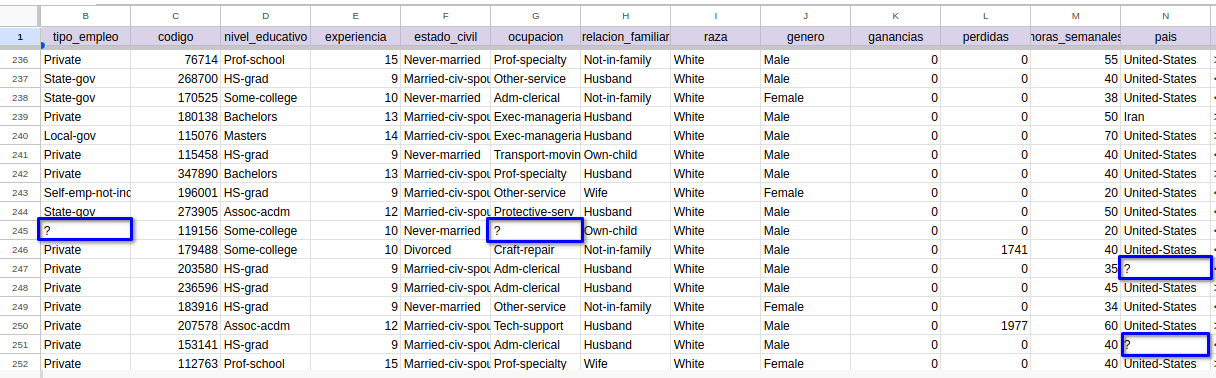

In [ ]:
# Contar los valores nulos ("?") en cada columna
nulos_por_columna = df.applymap(lambda x: 1 if x == "?" else 0).sum()
print("Valores nulos por columna\n")
print(nulos_por_columna)

# Calcular el porcentaje de valores nulos en cada columna
porcentaje_nulos_por_columna = (nulos_por_columna / len(df)) * 100

print("\nValores convertido a porcentajes\n")
print(porcentaje_nulos_por_columna)


# Definir el umbral para considerar si una columna tiene el 30% de datos faltantes
umbral = 30

# Identificar las columnas que tienen el 30% o más de datos faltantes
columnas_con_muchos_nulos = porcentaje_nulos_por_columna[porcentaje_nulos_por_columna >= umbral].index

if len(columnas_con_muchos_nulos) > 0:
    print("Columnas con el 30% o más de datos faltantes:")
    print(columnas_con_muchos_nulos)
else:
    print("No hay columnas con el 30% de los datos faltantes")

Valores nulos por columna

edad                    0
tipo_empleo          1836
codigo                  0
nivel_educativo         0
experiencia             0
estado_civil            0
ocupacion            1843
relacion_familiar       0
raza                    0
genero                  0
ganancias               0
perdidas                0
horas_semanales         0
pais                  583
salario                 0
dtype: int64

Valores convertido a porcentajes

edad                 0.000000
tipo_empleo          5.638647
codigo               0.000000
nivel_educativo      0.000000
experiencia          0.000000
estado_civil         0.000000
ocupacion            5.660146
relacion_familiar    0.000000
raza                 0.000000
genero               0.000000
ganancias            0.000000
perdidas             0.000000
horas_semanales      0.000000
pais                 1.790486
salario              0.000000
dtype: float64
No hay columnas con el 30% de los datos faltantes


Se pudo observar que sólo tres columnas contienen datos faltantes: tipo_empleo, ocupacion y pais, dónde cada una tiene un porcentaje de datos nulos 5.6%, 5.6% y 1.8% respectivamente.

# Punto 3
**Construya un gráfico de cajas y bigotes para 2 variables numéricas, en relación con clase.  Concluya al respecto.**

**Conclusiones**

Respecto al siguiente gráfico se puede concluir:

1. **Distribución de Edades:**
   - En ambos grupos, la edad máxima registrada es 90 años, mientras que la edad mínima es 17 años. Estos valores extremos pueden considerarse atípicos.
   - La mediana (Q2) de edades en el grupo con salarios >50K es mayor (44 años) en comparación con el grupo con salarios <=50K (34 años). Esto sugiere que las personas con salarios más altos tienden a ser más mayores en promedio.

2. **Dispersión y Variabilidad:**
   - Los rangos intercuartiles (IQR) de edades son 21 años para salarios <=50K y 15 años para salarios >50K. Esto indica que las edades en el grupo <=50K tienden a ser más dispersas en comparación con el grupo >50K.
   - En ambos grupos, hay valores que se consideran atípicos, ya que están más allá de los límites superiores e inferiores (upper fence y lower fence).

3. **Limpieza de Datos:**
   - Dado que aún no se ha realizado la limpieza de datos, es importante revisar y abordar los valores atípicos. Estos valores extremos podrían afectar la precisión del análisis y modelos. Se debe considerar que si estos valores atípicos son errores de entrada, casos excepcionales o si deben ser tratados de alguna manera antes de sacar conclusiones finales.

4. **Tendencias Generales:**
   - Las edades en ambos grupos varían significativamente, lo que puede ser un factor importante en el análisis de la relación entre edad y salario. Es posible que desees explorar más a fondo cómo otras variables podrían estar relacionadas con esta distribución de edades y cómo se refleja en los salarios.

En resumen, las conclusiones actuales sugieren que las edades varían entre las dos categorías de salario, con una tendencia a mayores edades en el grupo con salarios más altos. La limpieza de datos es esencial para obtener resultados más precisos y confiables, y podría influir en las conclusiones finales.

In [ ]:
px.box(df,x = 'salario',y='edad', color='salario',
       title='Boxplots edad con relación al salario')

# Conclusion

Respecto al siguiente grafico se puede concluir:

1. **Distribución de Experiencia:**
- En la categoría de salario "<=50k", la experiencia máxima registrada es de 16 años, mientras que en la categoría de salario ">50k" también se alcanza una experiencia máxima de 16 años. Esto sugiere que ambas categorías contienen individuos con experiencias similares.
- En ambas categorías de salario, se observan valores bajos de experiencia en el primer cuartil, con un valor de 1 año en ambos casos.

2. **Dispersion y Variabilidad:**
- El rango de experiencia es amplio en ambas categorías de salario, abarcando desde 1 año hasta 16 años.
- La variabilidad en la experiencia es más pronunciada en la categoría ">50k", ya que el tercer cuartil (Q3) y el valor máximo son mayores en comparación con la categoría "<=50k".

3. **Tendencias Generales:**
- En ambas categorías de salario, la mediana de experiencia es mayor que el primer cuartil (Q1), lo que indica que la mayoría de las personas tienen experiencia superior al valor del primer cuartil.
- La mediana de experiencia en la categoría ">50k" es mayor que en la categoría "<=50k", lo que sugiere que los individuos con salarios más altos tienden a tener más experiencia en general.


En resumen los boxplots muestran que, a pesar de algunas similitudes en la distribución de experiencia entre las categorías de salario, hay diferencias notables en cuanto a la dispersión y tendencias. El hecho de que en la categoría de salario ">50k" se observen valores superiores en los cuartiles superiores y la mediana indica una mayor concentración de personas con mayor experiencia. Sin embargo, es importante tener en cuenta que estos resultados se basan en los datos originales y aún no se han realizado las etapas de limpieza y preparación de los datos.

In [ ]:
px.box(df,x = 'salario',y='experiencia', color='salario',
       title='Boxplots experiencia con relación al salario')

# Punto 4

**Solucione los problemas referentes a calidad de datos presentes en al menos 6 variables, al menos dos de ellas deben ser categóricas. Elimine columnas irrelevantes. Identifique los datos atípicos reemplace esos valores por la media de cada clase o la moda, según corresponda. Debe agregar un párrafo, describiendo de manera ejecutiva, cuál fue el proceso seguido.**

Se copia un dataframe a partir del original para no modificar el principal.

In [ ]:
# Crear un DataFrame "df_limpio" a partir del original "df"
df_limpio = df.copy()

#Variables numéricas

---

*   **edad:** En esta etapa, hemos trabajado en mejorar la calidad de la variable "edad" en nuestro conjunto de datos. Hemos calculado las edades promedio para dos grupos según el salario y luego corregido valores extremos. Esto nos garantiza una representación precisa y coherente de las edades, lo que es esencial para análisis futuros.

In [ ]:
# Calcular la media de la edad para cada grupo de salario
media_edad_menor_igual_50k = df_limpio.loc[df_limpio['salario'] == '<=50K', 'edad'].mean()
media_edad_mayor_50k = df_limpio.loc[df_limpio['salario'] == '>50K', 'edad'].mean()

# Identificar y reemplazar valores atípicos en 'edad' según el grupo de salario
rango_edad_valido_menor_igual_50k = (0, 75)  # Definir el rango de edad válido para "<=50k"
rango_edad_valido_mayor_50k = (0, 73)  # Definir el rango de edad válido para ">50k"

df_limpio['edad'] = np.where((df_limpio['salario'] == '<=50K') & ((df_limpio['edad'] < rango_edad_valido_menor_igual_50k[0]) | (df_limpio['edad'] > rango_edad_valido_menor_igual_50k[1])),
                             media_edad_menor_igual_50k,
                             df_limpio['edad'])

df_limpio['edad'] = np.where((df_limpio['salario'] == '>50K') & ((df_limpio['edad'] < rango_edad_valido_mayor_50k[0]) | (df_limpio['edad'] > rango_edad_valido_mayor_50k[1])),
                             media_edad_mayor_50k,
                             df_limpio['edad'])


#Variables categóricas

---


*   **tipo_empleo:** En esta etapa, hemos trabajado en mejorar la integridad de la variable "tipo_empleo" en nuestro conjunto de datos. Para lograrlo, hemos reemplazado los valores faltantes (representados por "?") en función de los distintos niveles de salario: "<=50K" y ">50K". Esto asegura que nuestros datos estén más completos y preparados para análisis posteriores.

In [ ]:
# Calcular las modas de 'tipo_empleo' para cada grupo de salario
moda_tipo_empleo_menor_igual_50k = df_limpio.loc[df_limpio['salario'] == '<=50K', 'tipo_empleo'].mode()[0]
moda_tipo_empleo_mayor_50k = df_limpio.loc[df_limpio['salario'] == '>50K', 'tipo_empleo'].mode()[0]

# Reemplazar los valores "?" en 'tipo_empleo' según el grupo de salario
df_limpio['tipo_empleo'] = np.where((df_limpio['salario'] == '<=50K') & (df_limpio['tipo_empleo'] == "?"),
                                   moda_tipo_empleo_menor_igual_50k,
                                   df_limpio['tipo_empleo'])

df_limpio['tipo_empleo'] = np.where((df_limpio['salario'] == '>50K') & (df_limpio['tipo_empleo'] == "?"),
                                   moda_tipo_empleo_mayor_50k,
                                   df_limpio['tipo_empleo'])

# Contar los valores nulos ("?") en la columna 'tipo_empleo'
nulos_tipo_empleo = df_limpio['tipo_empleo'].apply(lambda x: 1 if x == "?" else 0).sum()

print("Cantidad de valores nulos en la columna 'tipo_empleo' después del reemplazo:", nulos_tipo_empleo)


Cantidad de valores nulos en la columna 'tipo_empleo' después del reemplazo: 0


*   **Ocupacion:** Hemos trabajado en mejorar la información sobre ocupación en nuestros datos. Para hacerlo, reemplazamos los espacios en blanco (representados por "?") según los diferentes niveles de ingresos: "<=50K" y ">50K". Esto asegura que los datos estén más completos y listos para su análisis. En resumen, ajustamos la información de ocupación para que esté en buen estado y sea útil en nuestras futuras investigaciones.

In [ ]:
# Calcular las modas de 'ocupacion' para cada grupo de salario
moda_ocupacion_menor_igual_50k = df_limpio.loc[df_limpio['salario'] == '<=50K', 'ocupacion'].mode()[0]
moda_ocupacion_mayor_50k = df_limpio.loc[df_limpio['salario'] == '>50K', 'ocupacion'].mode()[0]

# Reemplazar los valores "?" en 'ocupacion' según el grupo de salario
df_limpio['ocupacion'] = np.where((df_limpio['salario'] == '<=50K') & (df_limpio['ocupacion'] == "?"),
                                  moda_ocupacion_menor_igual_50k,
                                  df_limpio['ocupacion'])

df_limpio['ocupacion'] = np.where((df_limpio['salario'] == '>50K') & (df_limpio['ocupacion'] == "?"),
                                  moda_ocupacion_mayor_50k,
                                  df_limpio['ocupacion'])

# Contar los valores nulos ("?") en la columna 'ocupacion'
nulos_ocupacion = df_limpio['ocupacion'].apply(lambda x: 1 if x == "?" else 0).sum()

print("Cantidad de valores nulos en la columna 'ocupacion' después del reemplazo:", nulos_ocupacion)


Cantidad de valores nulos en la columna 'ocupacion' después del reemplazo: 0


*   **Pais:** Aqui hemos trabajado en mejorar la información sobre el país en nuestros datos. Para hacerlo, hemos reemplazado los espacios en blanco (representados por "?") según los diferentes niveles de ingresos: "<=50K" y ">50K". Esto hace que nuestros datos estén más completos y listos para analizar.

In [ ]:
# Calcular las modas de 'pais' para cada grupo de salario
moda_pais_menor_igual_50k = df_limpio.loc[df_limpio['salario'] == '<=50K', 'pais'].mode()[0]
moda_pais_mayor_50k = df_limpio.loc[df_limpio['salario'] == '>50K', 'pais'].mode()[0]

# Reemplazar los valores "?" en 'pais' según el grupo de salario
df_limpio['pais'] = np.where((df_limpio['salario'] == '<=50K') & (df_limpio['pais'] == "?"),
                             moda_pais_menor_igual_50k,
                             df_limpio['pais'])

df_limpio['pais'] = np.where((df_limpio['salario'] == '>50K') & (df_limpio['pais'] == "?"),
                             moda_pais_mayor_50k,
                             df_limpio['pais'])

# Contar los valores nulos ("?") en la columna 'pais'
nulos_pais = df_limpio['pais'].apply(lambda x: 1 if x == "?" else 0).sum()

print("Cantidad de valores nulos en la columna 'pais' después del reemplazo:", nulos_pais)


Cantidad de valores nulos en la columna 'pais' después del reemplazo: 0


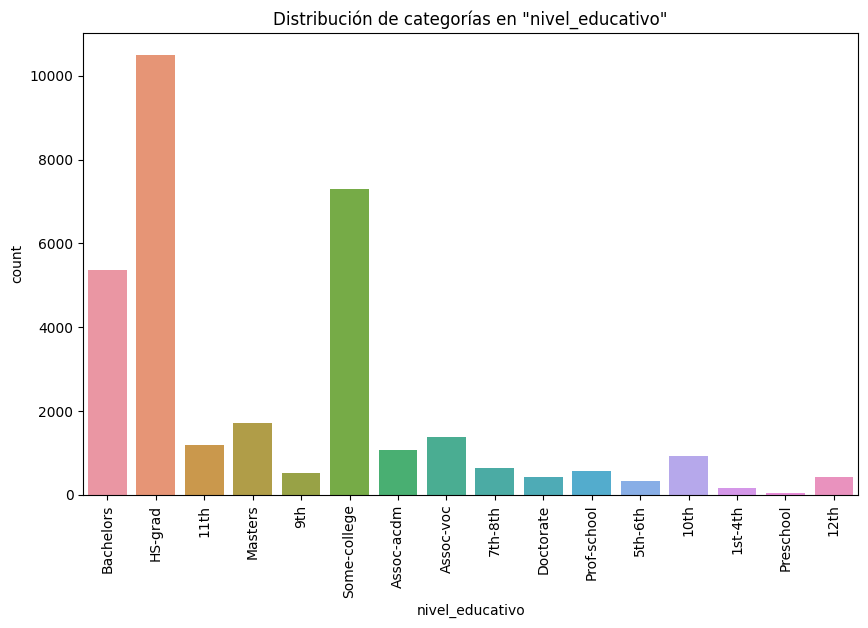

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='nivel_educativo')
plt.xticks(rotation=90)
plt.title('Distribución de categorías en "nivel_educativo"')
plt.show()



*   **Nivel Educativo:** decidimos agrupar las categorías en la variable "nivel_educativo" porque originalmente había muchas categorías distintas. Esta simplificación se hizo para mejorar la comprensión de los datos y facilitar análisis posteriores. Las categorías se organizaron en grupos basados en la naturaleza progresiva de la educación, desde la educación básica hasta la educación universitaria avanzada. Esto nos permite examinar el nivel educativo de manera más coherente y significativa.

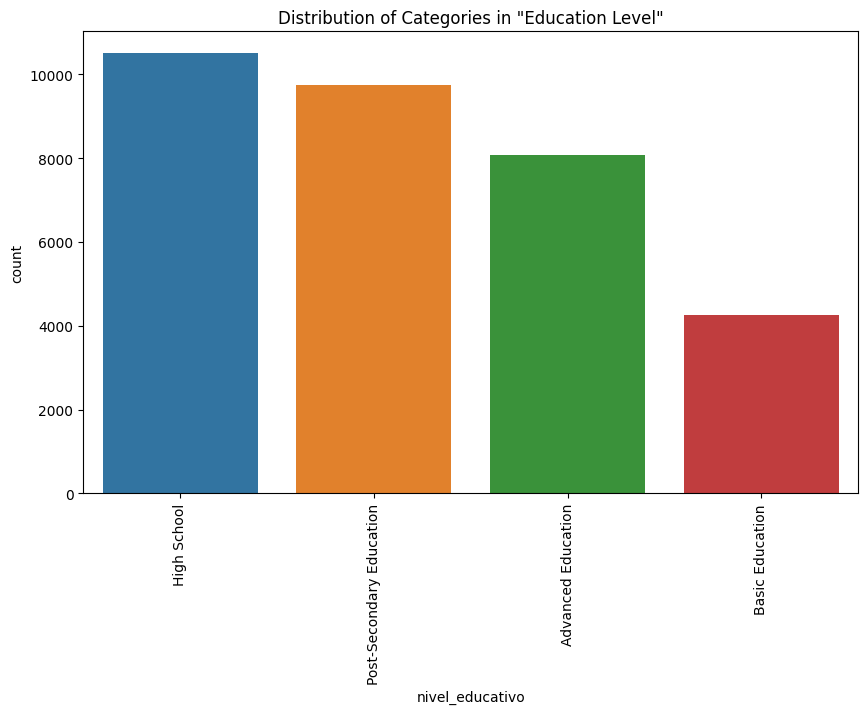

In [ ]:
df_limpio['nivel_educativo'] = df_limpio['nivel_educativo'].replace({
    'Preschool': 'Basic Education',
    '1st-4th': 'Basic Education',
    '5th-6th': 'Basic Education',
    '7th-8th': 'Basic Education',
    '9th': 'Basic Education',
    '10th': 'Basic Education',
    '11th': 'Basic Education',
    '12th': 'Basic Education',
    'HS-grad': 'High School',
    'Some-college': 'Post-Secondary Education',
    'Assoc-acdm': 'Post-Secondary Education',
    'Assoc-voc': 'Post-Secondary Education',
    'Bachelors': 'Advanced Education',
    'Masters': 'Advanced Education',
    'Doctorate': 'Advanced Education',
    'Prof-school': 'Advanced Education'
})

plt.figure(figsize=(10, 6))
sns.countplot(data=df_limpio, x='nivel_educativo', order=df_limpio['nivel_educativo'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Categories in "Education Level"')
plt.show()


*   **Relacion familiar:** se ha utilizado una tabla de contingencia para relacionar las dos variables categóricas "relacion_familiar" y "estado_civil" dónde se ha encontrado que ambas variables representan un contexto similar y una podría reemplazar a la otra, por lo tanto se ha decidido eliminar la varible "relacion_familiar". Además, se ha tenido en cuenta que para eliminar una u otra variable, la variable escogida cuenta con dos valores que ya están representados en otra columna, exactamente los valores "Husband" y "Wife"; que se pueden obtener directamente de la variable "genero" para un futuro análisis.

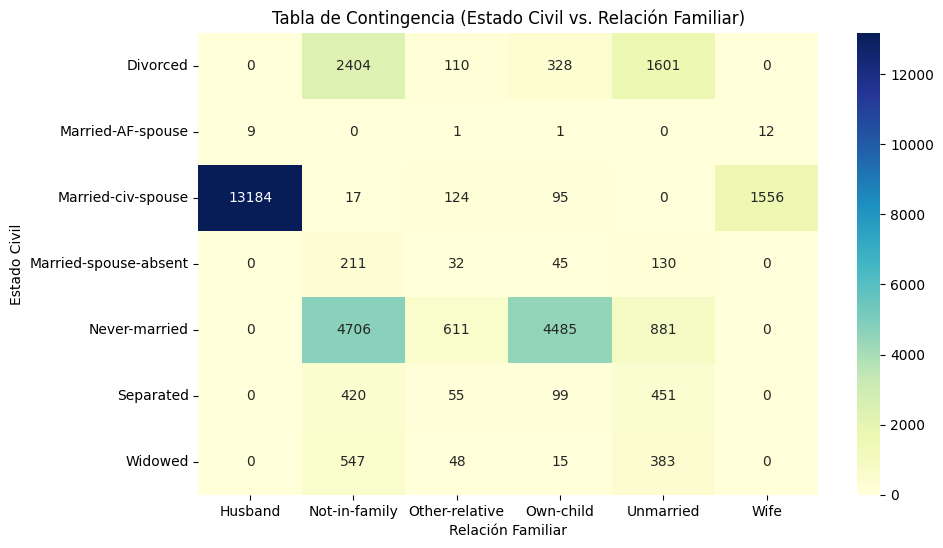

<ipython-input-14-30f672b96a4a>:14: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [ ]:
# Crear una tabla de contingencia (tabla de frecuencia conjunta)
contingency_table = pd.crosstab(df_limpio['estado_civil'], df_limpio['relacion_familiar'])

# Imprimir la tabla de contingencia

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Relación Familiar')
plt.ylabel('Estado Civil')
plt.title('Tabla de Contingencia (Estado Civil vs. Relación Familiar)')
plt.show()

# Eliminar columna "relacion_familiar"
df_limpio.drop(['relacion_familiar'], 'columns', inplace=True)

# Punto 5

**Construya 8 gráficos (explore diferentes gráficos, que no todos vayan a ser iguales).  Debe concluir sobre cada uno. Nota: los gráficos deben permitir evidenciar algo, si no se puede concluir nada al respecto no son de utilidad (esto llevará tiempo). Sugerencia hacer uso de Excel para una exploración previa y usar correlación de Pearson.**

#Gráfico 1

---

*   **Gráfico de barras apiladas (salario con estado_civil):** Los datos del gráfico presentado a continuación, muestran la cantidad de personas en diferentes categorías de estado civil (Divorced, Married, Never-married, Separated, Widowed) y cómo se distribuyen en función de dos niveles de salario (<=50K y >50K). A partir de estos datos se ha logrado concluir que:

**Nunca Casados y Salario Bajo:** En la categoría "<=50K" de salario, la mayoría de las personas tienen el estado civil "Never-married", algo contrario sucede en la categoría ">50K". Esto sugiere que una proporción significativa de la población que no se ha casado tiene un salario bajo.

**Casados y Salario Alto:** En la categoría ">50K" de salario, hay una cantidad considerable de personas con el estado civil "Married-civ-spouse". Esto podría indicar que las personas casadas tienen una mayor probabilidad de tener ingresos más altos.



In [ ]:
# Agrupa los datos por 'salario' y 'estado_civil' y cuenta las ocurrencias
data_grouped = df_limpio.groupby(['salario', 'estado_civil']).size().unstack().reset_index()

# Melt el DataFrame para usar con Plotly Express
data_melted = data_grouped.melt(id_vars='salario', var_name='Estado Civil', value_name='Cantidad')

# Crea un gráfico de barras apiladas interactivo con etiquetas de datos
fig = px.bar(data_melted, x='salario', y='Cantidad', color='Estado Civil',
             title='Gráfico de Barras Apiladas de Salario por Estado Civil',
             labels={'salario': 'Salario', 'Cantidad': 'Cantidad'},
             text='Cantidad')  # Agrega etiquetas de datos

# Personaliza las etiquetas y el título
fig.update_xaxes(title_text='Salario')
fig.update_yaxes(title_text='Cantidad')

# Muestra el gráfico interactivo sin etiquetas visibles en las barras
fig.update_traces(texttemplate=None, textposition=None)

# Muestra el gráfico interactivo
fig.show()

#Gráfico 2

---

*   **:** del gráfico presentado a continuación se ha logrado concluir que

In [ ]:
# Crea un gráfico de barras horizontales para la variable "ocupación"
fig = px.bar(df_limpio, y='ocupacion', title='Distribución de Ocupaciones',
             labels={'ocupacion': 'Ocupación', 'count': 'Cantidad'}, color='ocupacion')

# Personaliza las etiquetas y el título
fig.update_xaxes(title_text='Cantidad')
fig.update_yaxes(title_text='Ocupación')

# Muestra el gráfico interactivo
fig.show()

#Gráfico 3

---

*  La distribución de niveles educativos en el conjunto de datos muestra una variedad de niveles, con la educación de nivel secundario (High School) como la categoría más representada, seguida de la educación postsecundaria.

    **High School (32.3%):** Aunque High School es la categoría educativa más común en tu conjunto de datos, las personas en esta categoría tienden a ser un poco más jóvenes, con una edad promedio de aproximadamente 38.65 años. Tienen una experiencia laboral promedio de alrededor de 9 años. Esto sugiere que muchas personas con educación secundaria pueden comenzar a trabajar relativamente temprano en sus vidas.

    **Advanced Education (24.8%):** La categoría de Advanced Education, que incluye niveles educativos más altos, tiene la edad promedio más alta, alrededor de 40.52 años. Además, estas personas tienen la experiencia laboral promedio más alta, aproximadamente 13.51 años. Esto indica que quienes han completado una educación avanzada pueden haber invertido más tiempo en su formación antes de ingresar al mercado laboral.

    **Basic Education (13.1%):** A pesar de que la categoría de Basic Education es menos común en términos de distribución, las personas en esta categoría también tienden a ser relativamente jóvenes, con una edad promedio de alrededor de 37.79 años. Tienen una experiencia laboral promedio de aproximadamente 5.60 años.

    **Post-Secondary Education (29.9%):** La educación postsecundaria es una categoría significativa y las personas en esta categoría tienen una edad promedio de aproximadamente 36.13 años, con una experiencia laboral promedio de aproximadamente 10.36 años. Esto podría indicar que quienes completan una educación postsecundaria a menudo ingresan al mercado laboral después de algunos años de formación adicional.

La educación se relaciona de manera significativa con la edad y la experiencia. Las personas con niveles educativos más altos tienden a ser mayores y tener más experiencia laboral en promedio, mientras que las personas con educación secundaria y básica tienden a ser más jóvenes y pueden ingresar al mercado laboral más temprano en sus vidas.

In [ ]:
# Crea un gráfico de tarta para la variable "nivel_educativo"
fig = px.pie(df_limpio, names='nivel_educativo', title='Distribución de Niveles Educativos')

# Personaliza el título
fig.update_traces(textposition='inside', textinfo='percent+label')

# Muestra el gráfico interactivo
fig.show()

# Agrupar por nivel educativo y calcular las estadísticas
educacion_stats = df_limpio.groupby('nivel_educativo').agg({'edad': 'mean', 'experiencia': 'mean'}).reset_index()

# Renombrar las columnas para mayor claridad
educacion_stats.rename(columns={'edad': 'Edad Promedio', 'experiencia': 'Experiencia Laboral Promedio'}, inplace=True)


# Crea un gráfico de barras interactivas con Plotly Express
fig = px.bar(educacion_stats, x='nivel_educativo', y=['Edad Promedio', 'Experiencia Laboral Promedio'],
             color_discrete_sequence=['skyblue', 'salmon'],
             title='Edad y Experiencia Laboral Promedio por Nivel Educativo')
fig.update_layout(xaxis_title='Nivel Educativo', yaxis_title='Promedio')
fig.show()



#Gráfico 4

---

* Se puede concluir que en la categoría "Private," que es la más grande en términos de cantidad total de personas, se observa que la mayoría de las personas tienen ingresos tanto menores como mayores a 50K. Esto sugiere que en el sector privado hay una amplia gama de ingresos, con una proporción considerable de empleados que ganan más de 50K, pero también una proporción significativa que gana menos de $50K. Esta variabilidad en los ingresos dentro del sector privado puede deberse a una diversidad de trabajos y roles dentro de esta categoría. texto en negrita

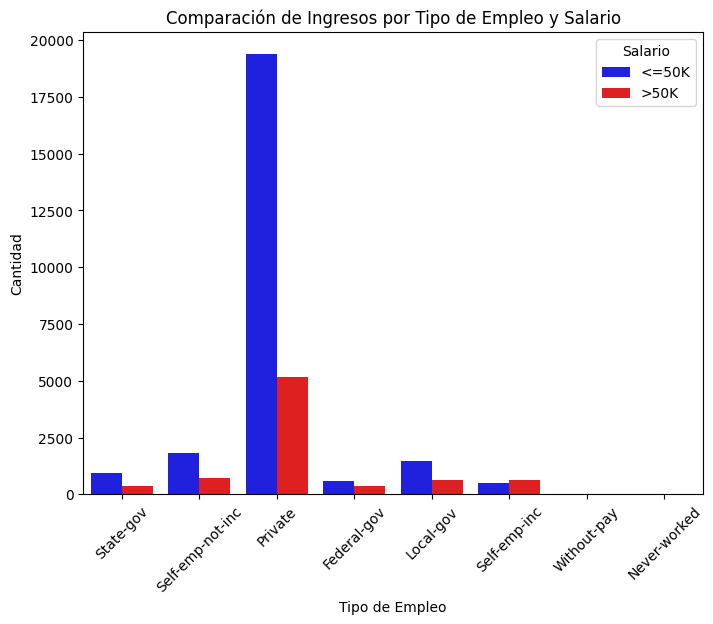

In [70]:
# Crear un gráfico de barras con matplotlib
plt.figure(figsize=(8, 6))
sns.countplot(data=df_limpio, x='tipo_empleo', hue='salario', palette=['blue', 'red'])
plt.title('Comparación de Ingresos por Tipo de Empleo y Salario')
plt.xlabel('Tipo de Empleo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Salario')
plt.show()

# Calcular la cantidad de personas con salario <=50K y >50K para cada tipo de empleo
resumen_empleo = df_limpio.groupby(['tipo_empleo', 'salario']).size().unstack(fill_value=0)

# Calcular el porcentaje de personas con salario >50K para cada tipo de empleo
resumen_empleo['Porcentaje >50K'] = (resumen_empleo['>50K'] / (resumen_empleo['<=50K'] + resumen_empleo['>50K'])) * 100


#Gráfico 5

---

*   Se puede concluir que la distribución de salarios por país de origen revela una característica destacada: la gran mayoría de la población en este conjunto de datos proviene de Estados Unidos. Esto se evidencia en las cifras abrumadoras de personas tanto con salarios menores como mayores a $50K en Estados Unidos en comparación con otros países.

Sin embargo, también es importante notar que, aunque Estados Unidos tiene una población significativa en ambos grupos de ingresos, otros países, como Mexico y Filipinas, también tienen una presencia mas pequeña de personas con salarios menores a $50K.

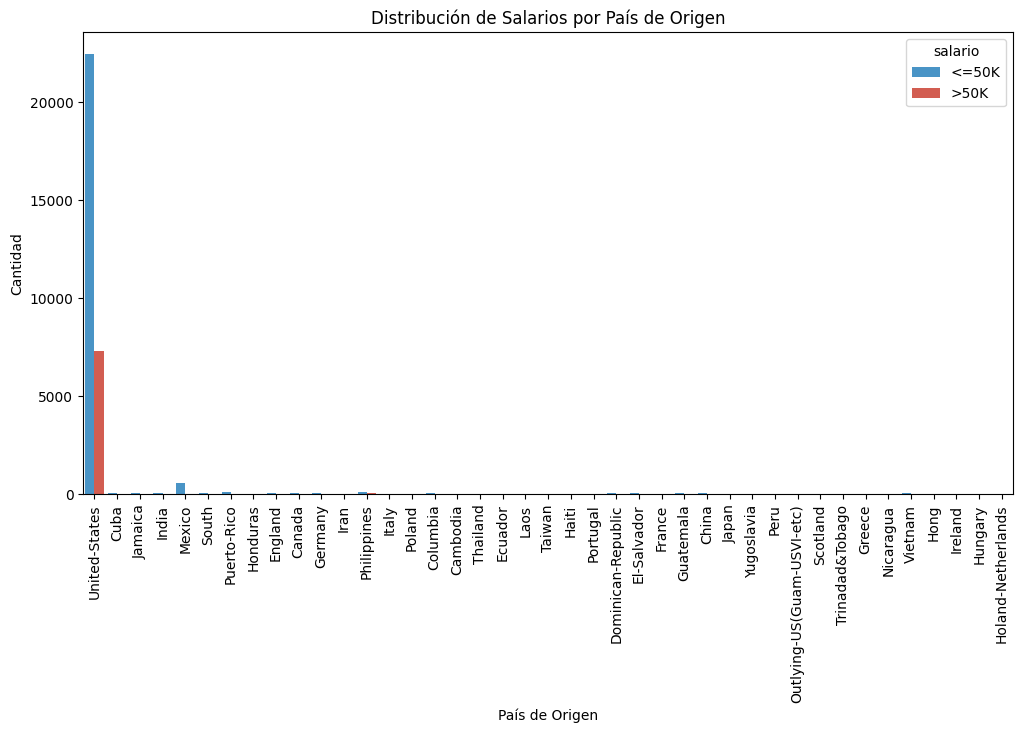

In [74]:
colores = ['#3498db', '#e74c3c']
# Distribución de Salarios por País de Origen
plt.figure(figsize=(12, 6))
sns.countplot(data=df_limpio, x='pais', hue='salario', palette=colores)
plt.title('Distribución de Salarios por País de Origen')
plt.xlabel('País de Origen')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show()
# Calcular la distribución de salarios por país de origen
distribucion_salarios = df_limpio.groupby(['pais', 'salario']).size().unstack(fill_value=0)

#Gráfico 6

---

* Se peude concluir que al comparar las ganancias promedio por ocupación, se observa que algunas ocupaciones, como "Exec-managerial" (Ejecutivo-Gerencial) y "Prof-specialty" (Especialidad Profesional), destacan por tener ganancias promedio significativamente más altas en la categoría de ingresos mayores a $50K. Por otro lado, "Priv-house-serv" (Servicio Doméstico Privado) sobresale al tener un promedio de ganancias mayor a 50K. Esta ocupación específica se diferencia de otras y merece una mayor atención para comprender mejor esta tendencia. En general, la elección de la ocupación sigue siendo un factor crucial en la determinación de los niveles de ingresos.

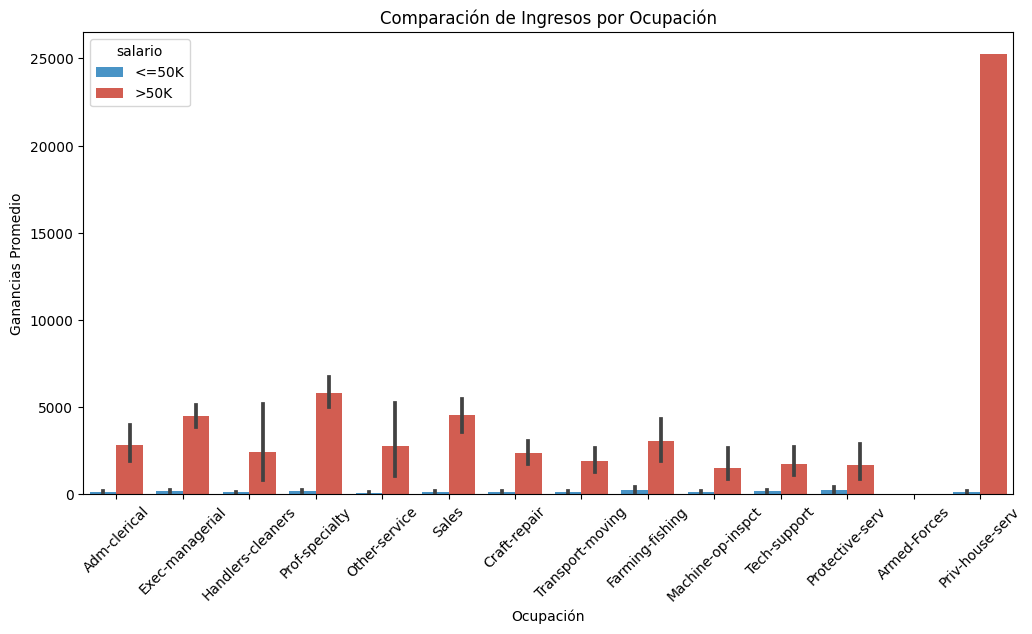

In [76]:
colores = ['#3498db', '#e74c3c']

# Comparación de Ingresos por Ocupación y Salario
plt.figure(figsize=(12, 6))
sns.barplot(data=df_limpio, x='ocupacion', y='ganancias', hue='salario', palette=colores)
plt.title('Comparación de Ingresos por Ocupación')
plt.xlabel('Ocupación')
plt.ylabel('Ganancias Promedio')
plt.xticks(rotation=45)
plt.show()
# Agrupar por ocupación y salario y calcular las ganancias promedio
comparacion_ingresos = df_limpio.groupby(['ocupacion', 'salario'])['ganancias'].mean().unstack(fill_value=0)

#Gráfico 7

---

En conclusión, en el conjunto de datos analizado, se observa que para el género masculino (Male), existe una marcada diferencia en la cantidad de individuos con salarios mayores a 50K en comparación con aquellos que ganan menos de $50K. La cantidad de hombres con salarios superiores es significativamente mayor (15,128) en comparación con aquellos que ganan menos (9,592). Esto indica que el género puede desempeñar un papel importante en la distribución de ingresos en esta población.

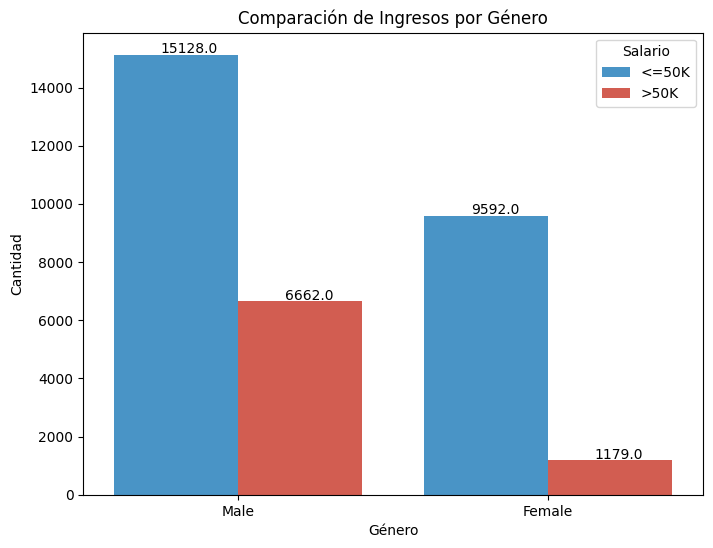

In [84]:
# Crea un gráfico de barras interactivo
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_limpio, x='genero', hue='salario', palette=colores)
plt.title('Comparación de Ingresos por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.legend(title='Salario')

# Obtiene los datos textuales de la gráfica
for p in ax.patches:
    height = p.get_height()
    x, y = p.get_xy()
    plt.annotate(f'{height}', (x + 0.15, y + height + 50))  # Ajusta la posición del texto

# Muestra el gráfico interactivo
plt.show()
